<h1>CREDIT RISK ANALYTICS</h1>

**Background:** Credit  scoring  is  the  set  of  decision  models  and  their  underlying  techniques 
that  aid  lenders  in  the  granting  of  consumer  credit.  These  techniques determine  who  will  get  credit,  how  much  credit  they  should  get,  and  what operational  strategies  will  enhance  the  profitability  of  the  borrowers  to  the lenders.  Further,  they  help  to  assess  the  risk  in  lending.  Credit  scoring  is  a dependable  assessment  of  a  person’s  credit  worthiness  since  it  is  based  on actual data.

#### Definition of Target and Outcome Window:
One of the leading banks would like to predict bad customer while customer applying for loan.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Pre-Processing -
 - Missing Values Treatment - Numerical (Mean/Median imputation) and Categorical (Separate Missing Category or Merging)
 - Univariate Analysis - Outlier and Frequency Analysis

### Load Dataset

In [3]:
bankloans = pd.read_csv("Data/bankloans.csv")

In [4]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [6]:
#number of observations and features
bankloans.shape

(850, 9)

In [7]:
#data types in the dataframe
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


<big>
- Checking for missing values

In [8]:
#check for any column has missing values
bankloans.isnull().any()

age         False
ed          False
employ      False
address     False
income      False
debtinc     False
creddebt    False
othdebt     False
default      True
dtype: bool

In [9]:
#check for number of missing values
bankloans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [10]:
#Segregating the numeric and categorical variable names

numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]


In [11]:
numeric_var_names

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [12]:
#splitting the data set into two sets - existing customers and new customers

bankloans_existing = bankloans.loc[bankloans.default.isnull() == 0]
bankloans_new = bankloans.loc[bankloans.default.isnull() == 1]

In [13]:
bankloans_existing.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


<big>
    - Checking for Outliers

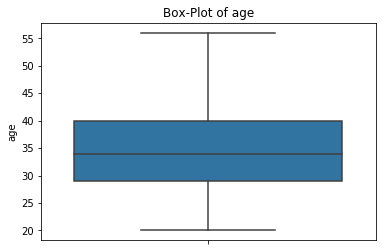

In [14]:
sns.boxplot(y = "age",data=bankloans_existing)
plt.title("Box-Plot of age")
plt.show()

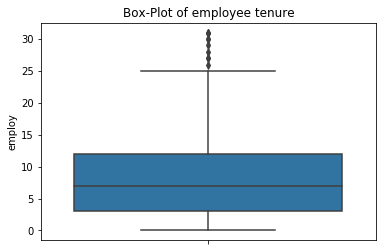

In [15]:
sns.boxplot(y = "employ",data=bankloans_existing)
plt.title("Box-Plot of employee tenure")
plt.show()

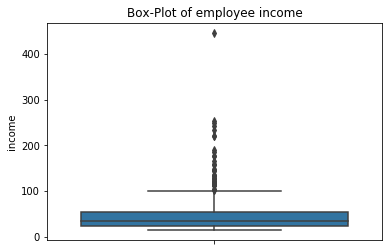

In [16]:
sns.boxplot(y = "income",data=bankloans_existing)
plt.title("Box-Plot of employee income")
plt.show()

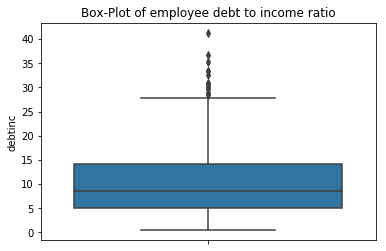

In [17]:
sns.boxplot(y = "debtinc",data=bankloans_existing)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

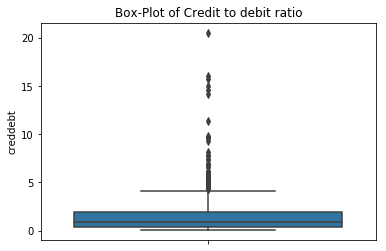

In [18]:
sns.boxplot(y = "creddebt",data=bankloans_existing)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

In [19]:
income_minlimit = bankloans_existing["income"].quantile(0.75) + 1.5 * (bankloans_existing["income"].quantile(0.75) - bankloans_existing["income"].quantile(0.25))
income_minlimit

101.5

In [20]:
def outlier_capping(x):
    """A funtion to remove and replace the outliers for numerical columns"""
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [21]:
#outlier treatment
bankloans_existing = bankloans_existing.apply(lambda x: outlier_capping(x))

In [22]:
##Correlation Matrix
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.015304,0.538677,0.592123,0.559895,0.013941,0.313544,0.365475,-0.148576
ed,0.015304,1.000000,-0.154969,0.053037,0.203476,0.010483,0.099387,0.152067,0.118521
employ,0.538677,-0.154969,1.000000,0.326449,0.709044,-0.047867,0.392857,0.414345,-0.297359
address,0.592123,0.053037,0.326449,1.000000,0.353059,0.018681,0.222171,0.243844,-0.167796
income,0.559895,0.203476,0.709044,0.353059,1.000000,-0.014102,0.541283,0.609575,-0.125480
debtinc,0.013941,0.010483,-0.047867,0.018681,-0.014102,1.000000,0.575929,0.645586,0.381220
creddebt,0.313544,0.099387,0.392857,0.222171,0.541283,0.575929,1.000000,0.645782,0.217890
othdebt,0.365475,0.152067,0.414345,0.243844,0.609575,0.645586,0.645782,1.000000,0.125387
default,-0.148576,0.118521,-0.297359,-0.167796,-0.125480,0.381220,0.217890,0.125387,1.000000


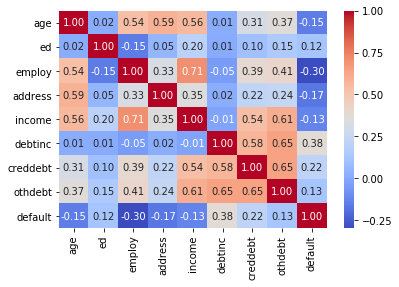

In [23]:
#Visualize the correlation using seaborn heatmap

sns.heatmap(bankloans_existing.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [24]:
bankloans_existing.shape

(700, 9)

In [25]:
bankloans_new.shape

(150, 9)

In [26]:
#Indicator variable unique types

bankloans_existing['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

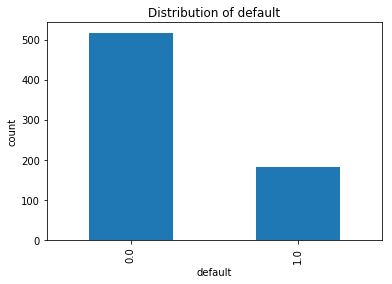

In [27]:
bankloans_existing['default'].value_counts().plot.bar()
plt.xlabel("default")
plt.ylabel("count")
plt.title("Distribution of default")
plt.show()

In [28]:
#percentage of unique types in indicator variable

round(bankloans_existing['default'].value_counts()/bankloans_existing.shape[0] * 100,3)

0.0    73.857
1.0    26.143
Name: default, dtype: float64

## Data Exploratory Analysis
- Bivariate Analysis - Numeric(TTest)/ Categorical(Chisquare)
- Bivariate Analysis - Visualization
- Variable Reduction - Multicollinearity

In [29]:
## performing the independent t test on numerical variables

tstats_df = pd.DataFrame()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_existing.loc[bankloans_existing["default"] == 1,eachvariable],bankloans_existing.loc[bankloans_existing["default"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)

In [30]:
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0
1,debtinc,9.95554,3.85688e-20
2,employ,-9.03873,7.73766e-18
3,creddebt,5.20625,3.90256e-07
4,address,-4.82342,2.07201e-06
5,age,-3.83057,0.0001557
6,income,-3.51615,0.000495008
7,othdebt,3.13998,0.00186546
8,ed,3.02788,0.00267847


### Bi-Variate Analysis

In [31]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'default', y = segment_by, data=bankloans_existing)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()
    

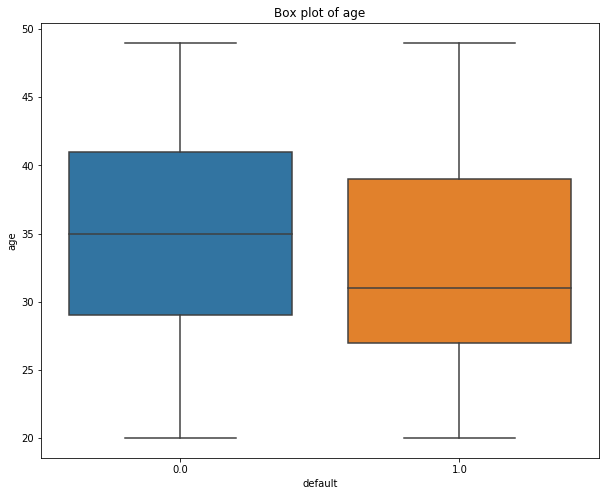

In [32]:
BivariateAnalysisPlot("age")

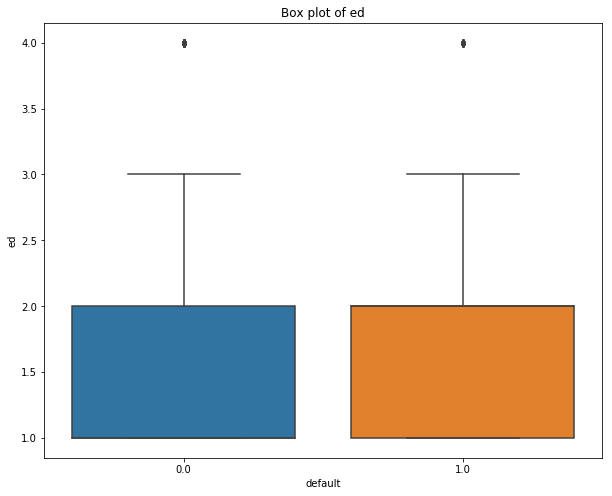

In [33]:
BivariateAnalysisPlot("ed")

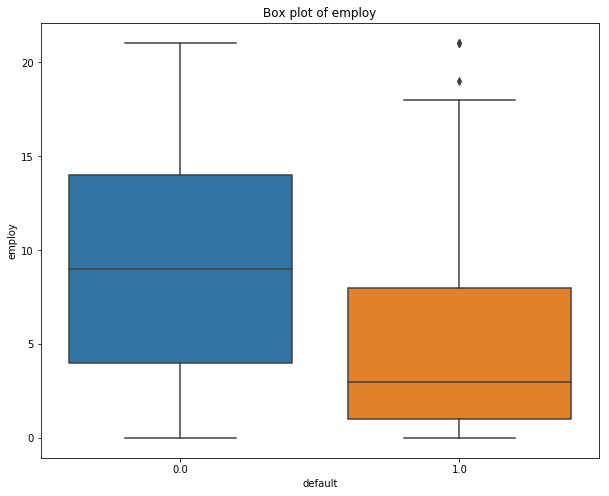

In [34]:
BivariateAnalysisPlot("employ")

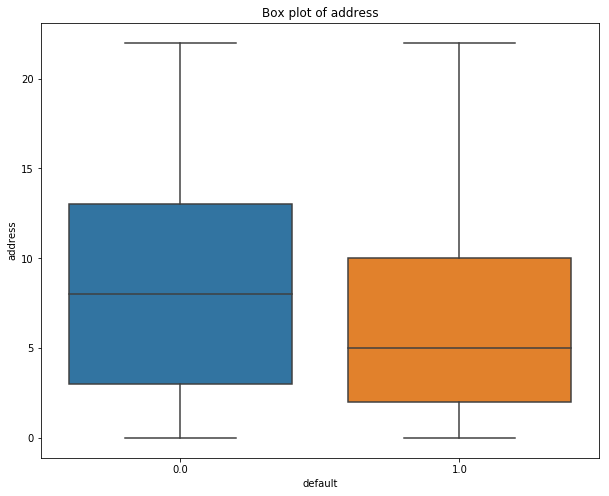

In [35]:
BivariateAnalysisPlot("address")

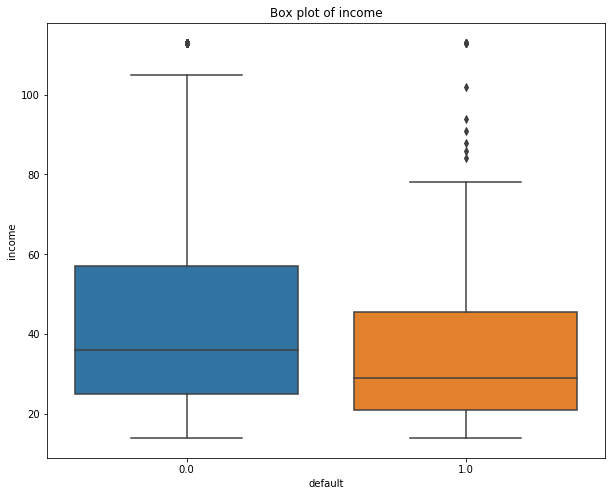

In [36]:
BivariateAnalysisPlot("income")

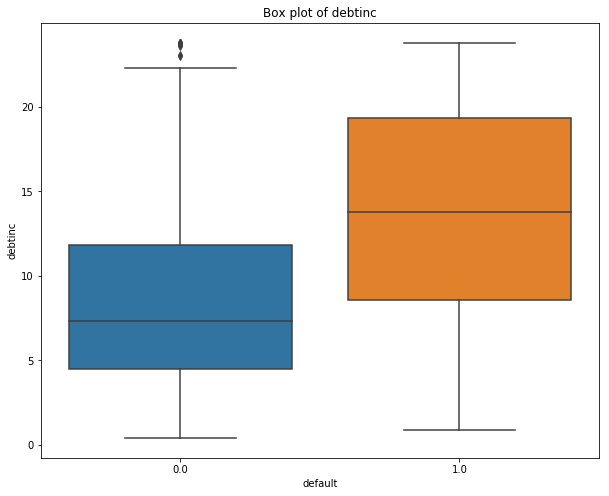

In [37]:
BivariateAnalysisPlot("debtinc")

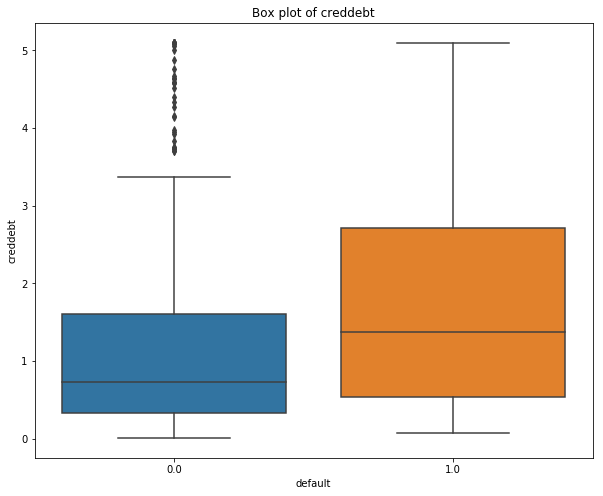

In [38]:
BivariateAnalysisPlot("creddebt")

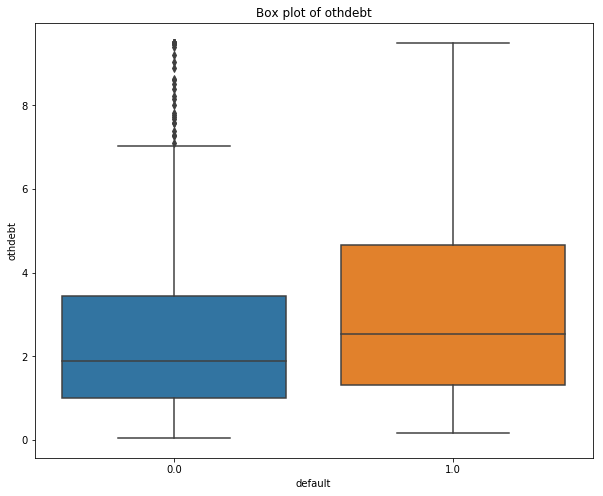

In [39]:
BivariateAnalysisPlot("othdebt")

### Multi Collinearity Check

In [40]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
features = "+".join(bankloans_existing.columns.difference(["default"]))

In [42]:
features

'address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [43]:
#perform vif

a, b = dmatrices(formula_like= 'default ~ ' + features,data=bankloans_existing,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

In [44]:
vif

,VIF Factor,Features
0,41.554332,Intercept
1,1.549227,address
2,2.069008,age
3,2.928049,creddebt
4,5.049334,debtinc
5,1.292872,ed
6,2.624197,employ
7,5.908874,income
8,5.340459,othdebt


### Observations
----
<big>
- There are 850 observations and 9 features in the data set
- All 9 features are numerical in nature
- There are no missing values in the data set
- Out of 850 customers data, 700 are existing customers and 150 are new customers
- In the 700 existing customers, 517 customers are tagged as non defaulters and remaining 183 are tagged as defaulters
- The data is highly imbalanced
- From VIF check, found out that the correlation between the variables is within the acceptable limits

## Model Building and Model Diagnostics

   - Logistic Regression
   - Decision Tree classifier
---
**Model Diagnostics**

- Train and Test split
- Significance of each Variable
- Gini and ROC / Concordance analysis
- Classification Table Analysis - Accuracy

### Logistic Regression

In [45]:
featurecolumns = bankloans_existing.columns.difference(['default'])
featurecolumns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [46]:
#Train and test split

train_X,test_X,train_y,test_y = train_test_split(bankloans_existing[featurecolumns],
                                                 bankloans_existing['default'], stratify = bankloans_existing['default'], test_size = 0.2, random_state = 123)

In [47]:
train_X.shape

(560, 8)

In [48]:
test_X.shape

(140, 8)

In [49]:
round(train_y.value_counts()/train_y.shape[0] * 100,3)

0.0    73.929
1.0    26.071
Name: default, dtype: float64

In [50]:
## Model Building

logreg = LogisticRegression()
logreg.fit(train_X,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

,Features,Coefficients
0,address,-0.102220
1,age,0.013277
2,creddebt,0.621946
3,debtinc,0.071535
4,ed,0.086670
5,employ,-0.216281
6,income,0.000654
7,othdebt,0.054429


In [52]:
logreg.intercept_

array([-1.32423818])

### Model Performance 
- Test data set

#### Metrics

- Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized
- Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

In [53]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':test_y, 'predicted': logreg.predict(test_X)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [54]:
#creating a confusion matrix
cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[20, 17],
       [10, 93]], dtype=int64)

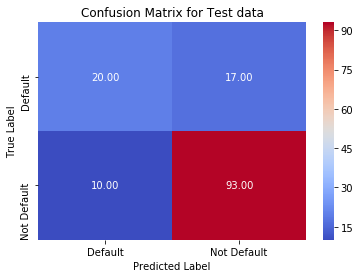

In [55]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [56]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.667


In [57]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.807


In [58]:
bankloans_test_pred_log.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [59]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       103
         1.0       0.67      0.54      0.60        37

   micro avg       0.81      0.81      0.81       140
   macro avg       0.76      0.72      0.74       140
weighted avg       0.80      0.81      0.80       140



#### Inference
-----

<big>
Overall test accuracy is 80%. But it is not a good measure. There are lot of cases which are default and the model has predicted them as not default. The objective of the model is to identify the customers who will default, so that the bank can intervene and act.This might be the case as the default model assumes people with more than 0.5 probability will not default. 
</big>

### Find the optimum cutoff value

In [60]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(logreg.predict_proba(test_X))
predict_prob_df.head()

,0,1
0,0.807474,0.192526
1,0.941202,0.058798
2,0.710501,0.289499
3,0.178177,0.821823
4,0.633490,0.366510


In [61]:
bankloans_test_pred_log = pd.concat([bankloans_test_pred_log, predict_prob_df], axis = 1)
bankloans_test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,0.807474,0.192526
1,526,0.0,0.0,0.941202,0.058798
2,689,0.0,0.0,0.710501,0.289499
3,430,1.0,1.0,0.178177,0.821823
4,245,0.0,0.0,0.633490,0.366510


In [62]:
#find the auc score

auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,4)

0.8675

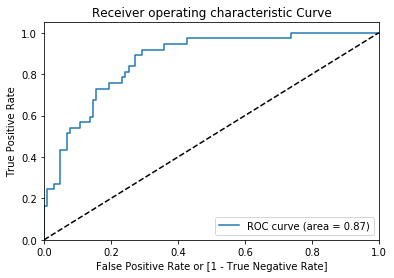

In [63]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

<big>
- Cutoff would be optimum where specificity and sensitivity would be maximum for the given cutoff

In [64]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [65]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
64,0.291262,0.918919,0.708738,0.224326,1.627657


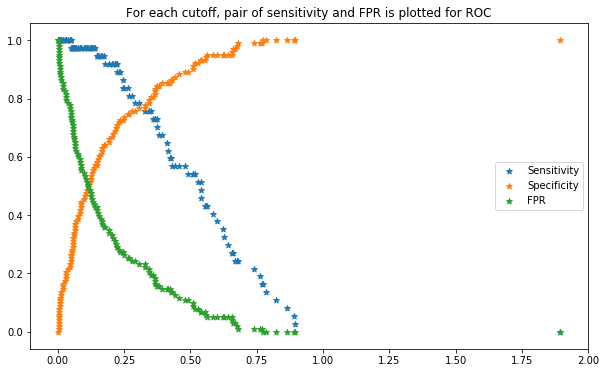

In [66]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

In [67]:
#Predicting with new cut-off probability
bankloans_test_pred_log['new_labels'] = bankloans_test_pred_log['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,0.0,0.807474,0.192526,0
1,526,0.0,0.0,0.941202,0.058798,0
2,689,0.0,0.0,0.710501,0.289499,1
3,430,1.0,1.0,0.178177,0.821823,1
4,245,0.0,0.0,0.633490,0.366510,1


In [68]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.new_labels,labels = [1,0])
cm_logreg

array([[33,  4],
       [30, 73]], dtype=int64)

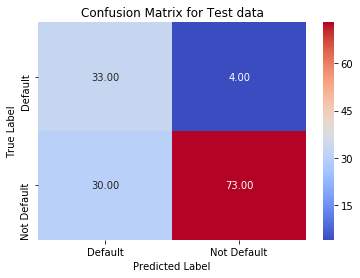

In [70]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [71]:
#classification report 

print(metrics.classification_report(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       103
         1.0       0.52      0.89      0.66        37

   micro avg       0.76      0.76      0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.84      0.76      0.77       140



In [72]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.892


In [73]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.757


#### Inference
-----

Even though the overall accuracy of the model is reduced from 80% to 75% by taking optimum cutoff as 0.224, Model performance i.e recall score (ability of the model to find all the positive samples - find all the default customers) has increased from 54% to 89%. The drawback of changing the cutoff value can be seen in drastic drop of precision score (ability of model not to label non default customers as default customers) from 67% to 52%. 


- We have a choice to make depending on the value we place on the true positives and our tolerance for false postivies, in practical the cutoff values depends on the business decision values.